3.535163790827692
3.5679015478588365
4.408042066718216
4.808930212883881
4.978815338917016
6.872612340325574
5.107030595963149
5.068405358275401


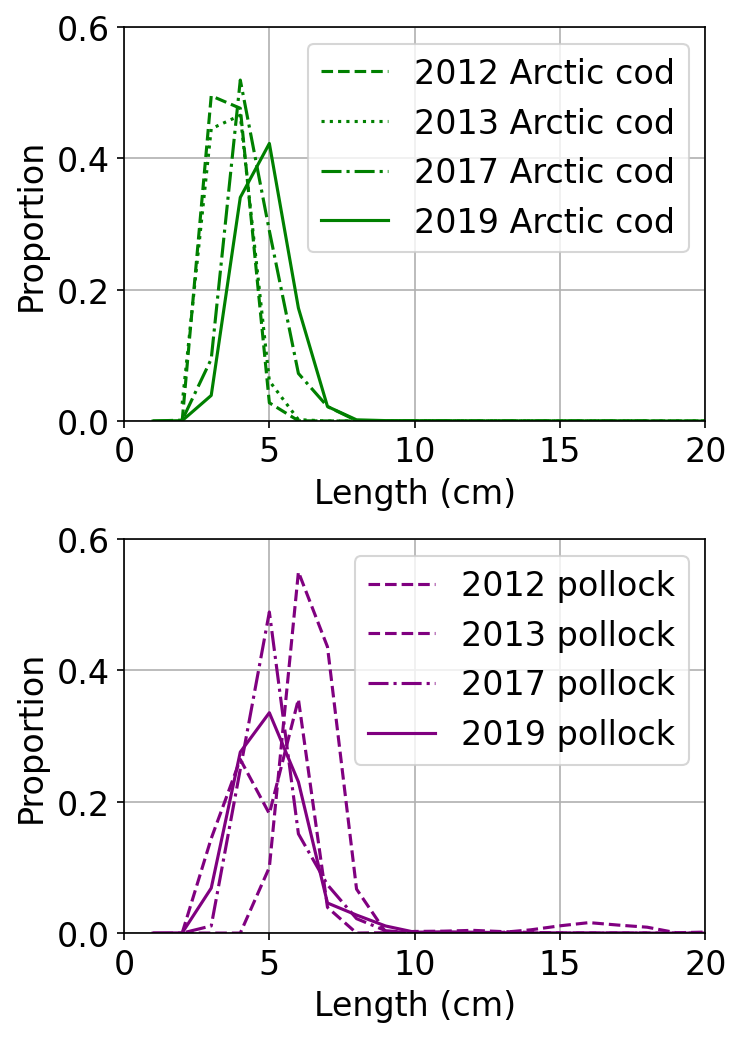

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (5,8),dpi=150)
plt.rcParams.update({'font.size': 16})
plt.subplot(211)
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2012_v2.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2013_v2.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21725.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21725.csv')
print(sum(df2012[df2012.Latitude >=65.9].sum()[3:]/sum(df2012[df2012.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print(sum(df2013[df2013.Latitude >=65.9].sum()[3:]/sum(df2013[df2013.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print(sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print(sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))
plt.plot(np.arange(2,31,1),df2012[df2012.Latitude >=65.9].sum()[3:]/sum(df2012[df2012.Latitude >=65.9].sum()[3:]),linestyle='--', color = '#008000')
plt.plot(np.arange(2,31,1),df2013[df2013.Latitude >=65.9].sum()[3:]/sum(df2013[df2013.Latitude >=65.9].sum()[3:]),linestyle=':', color = '#008000')
plt.plot(np.arange(1,19,1),df2017.sum()[3:23]/sum(df2017.sum()[3:23]),linestyle='-.', color = '#008000')
plt.plot(np.arange(1,21,1),df2019.sum()[3:23]/sum(df2019.sum()[3:23]),linestyle='-', color = '#008000')
plt.xlim(0,20)
plt.ylim(0,0.6)
plt.grid()
plt.legend(['2012 Arctic cod','2013 Arctic cod','2017 Arctic cod','2019 Arctic cod'])
plt.xlabel('Length (cm)')
plt.ylabel('Proportion')

plt.subplot(212)
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2012_for_IERP.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2013_for_IERP.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21744.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21744.csv')
print(sum(df2012.sum()[3:23]/sum(df2012.sum()[3:23])*np.arange(2,22,1)))
print(sum(df2013.sum()[3:23]/sum(df2013.sum()[3:23])*np.arange(2,22,1)))
print(sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print(sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))
plt.plot(np.arange(2,22,1),df2012.sum()[3:23]/sum(df2012.sum()[3:23]),linestyle='--',color = '#800080')
plt.plot(np.arange(2,22,1),df2013.sum()[3:23]/sum(df2012.sum()[3:23]),linestyle='--',color = '#800080')
plt.plot(np.arange(1,19,1),df2017.sum()[3:23]/sum(df2017.sum()[3:23]),linestyle='-.',color = '#800080')
plt.plot(np.arange(1,21,1),df2019.sum()[3:23]/sum(df2019.sum()[3:23]),linestyle='-',color = '#800080')
plt.xlim(0,20)
plt.ylim(0,0.6)
plt.grid()
plt.legend(['2012 pollock','2013 pollock','2017 pollock','2019 pollock'])
plt.xlabel('Length (cm)')
plt.ylabel('Proportion')
plt.subplots_adjust(hspace=0.3)

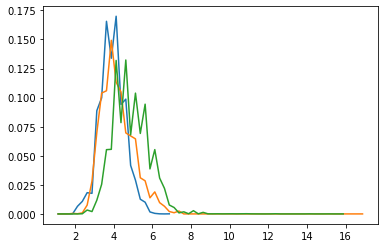

In [8]:
a = pd.read_csv('../data/catchData/2017_2019/specimen_complete_selectivity.csv')
for survey in [2013001,201701,201901]:
    b = a[a.SURVEY==survey]
    c = b[(b.SPECIES_CODE==21725) & (b.GEAR == 'Marinovich') & (b.NET_PARTITION== 'Codend')]
    cts = []
    for l in np.arange(1, np.ceil(c.CONSISTENT_LENGTH.max()),.25):
        cts.append(c[(c.CONSISTENT_LENGTH >= l) & (c.CONSISTENT_LENGTH < l+.25)].totalExp.sum())
    plt.plot(np.arange(1, np.ceil(c.CONSISTENT_LENGTH.max()),.25)+.125,cts/sum(cts))

# Growth at temperature

The following two equations come from Laurel et al. (2017) and are being used to validate size at temperature based on size at weight (Figure 2) and growth rate as a function of temperature (Table 2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sl2w(sl): # input is SL in mm
    logw = (3.052*np.log10(sl))-5.165
    w = 10**(logw)
    return w # retun is WW in g

def w2sl(w): # input is ww in g
    logsl = (np.log10(w) + 5.165)/3.052
    sl = 10**(logsl)
    return sl # retun is WW in g

def gr(T,sl): #temp in C, sl in mm
    W = sl2w(sl)
    a = 1+((T-8.9048)/7.3979)**2
    b = ((W+43.2741)/10.1054)**2
    gr = 48.1376/(a*b)
    return gr #return gr as a %mass/day

def grSL(curL,curT,maxT,days):
    curW = sl2w(curL)
    ct = 0
    l = [curL]
    tSteps = (maxT-curT)/days
    while ct < days:
        a = gr(curT,curL)
        curW = curW*(1+a/100)
        curL = w2sl(curW)
        curT = curT+tSteps
        l.append(curL)
        ct+=1
    return l

48.02289628392907
52.31312236393522


Text(0, 0.5, 'SL (mm)')

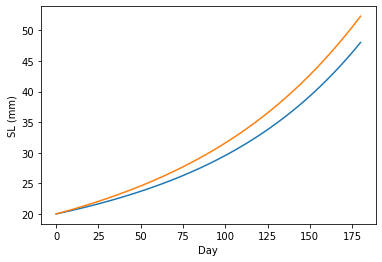

In [4]:
# Increasing temperatures, same "cap"
l = grSL(20,-1.2,6,6*30)
plt.plot(l)
print(max(l))
l = grSL(20,.5,6,6*30)
plt.plot(l)
print(max(l))
plt.xlabel('Day')
plt.ylabel('SL (mm)')

41.59997325197874
47.68447621333916


Text(0, 0.5, 'SL (mm)')

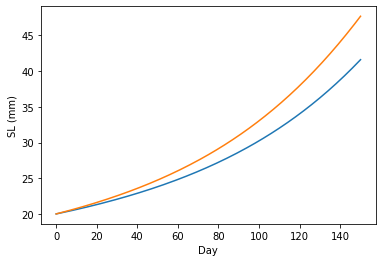

In [103]:
# Increasing temperatures, cooler vs warm "cap"
l = grSL(20,-1.2,6,5*30)
plt.plot(l)
print(max(l))
l = grSL(20,.3,7.5,5*30)
plt.plot(l)
print(max(l))
plt.xlabel('Day')
plt.ylabel('SL (mm)')

41.031466253818685


Text(0, 0.5, 'SL (mm)')

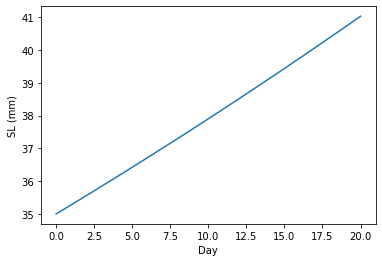

In [5]:
# Increasing temperatures, same "cap"
l = grSL(35,7.3,7.3,20)
plt.plot(l)
print(max(l))
plt.xlabel('Day')
plt.ylabel('SL (mm)')